In [1]:
%matplotlib inline
import quantstats as qs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
def vdir(obj):
    return [x for x in dir(obj) if not x.startswith('_')]
# extend pandas functionality with metrics, etc.
qs.extend_pandas()

In [2]:
# fetch the daily returns for a stock
stock = qs.utils.download_returns('FB')

# show sharpe ratio
qs.stats.sharpe(stock)

# or using extend_pandas() :)
stock.sharpe()

0.5755195125112951

In [3]:
tickerList = ['TFLO','EMBH','IBTA.L','IBTU.L','SHV','DFNM']

stocks = pd.DataFrame()
startDates = []
for i in tickerList:
    newStock = qs.utils.download_returns(i)
    stocks = pd.concat([stocks, newStock], axis=1)
    startDates.append(newStock.index[0])

In [4]:
stocks.columns = tickerList
display(stocks.tail(3))
display(startDates)
maxStartDate = max(startDates)
display(maxStartDate)

,TFLO,EMBH,IBTA.L,IBTU.L,SHV
2022-07-07 00:00:00,0.000198,0.003652,-0.002486,0.0001,0.000000
2022-07-08 00:00:00,0.000000,0.001941,-0.001246,0.0000,-0.000182
2022-07-11 00:00:00,NaN,-0.011666,NaN,0.0000,NaN


[Timestamp('2014-02-04 00:00:00'),
 Timestamp('2015-07-30 00:00:00'),
 Timestamp('2017-04-13 00:00:00'),
 Timestamp('2019-02-20 00:00:00'),
 Timestamp('2007-01-11 00:00:00')]

Timestamp('2019-02-20 00:00:00')

In [25]:
print('utils: '+vdir(qs.utils))
print('stats: '+vdir(qs.stats))
print('plots: '+vdir(qs.plots))
help(qs.stats.comp)

AttributeError: 'list' object has no attribute '__str_'

In [6]:
print(vdir(qs.utils))
help(qs.utils.make_portfolio)

['aggregate_returns', 'download_returns', 'exponential_stdev', 'group_returns', 'inspect', 'log_returns', 'make_index', 'make_portfolio', 'multi_shift', 'rebase', 'to_excess_returns', 'to_log_returns', 'to_prices', 'to_returns']
Help on function make_portfolio in module quantstats.utils:

make_portfolio(returns, start_balance=100000.0, mode='comp', round_to=None)
    Calculates compounded value of portfolio



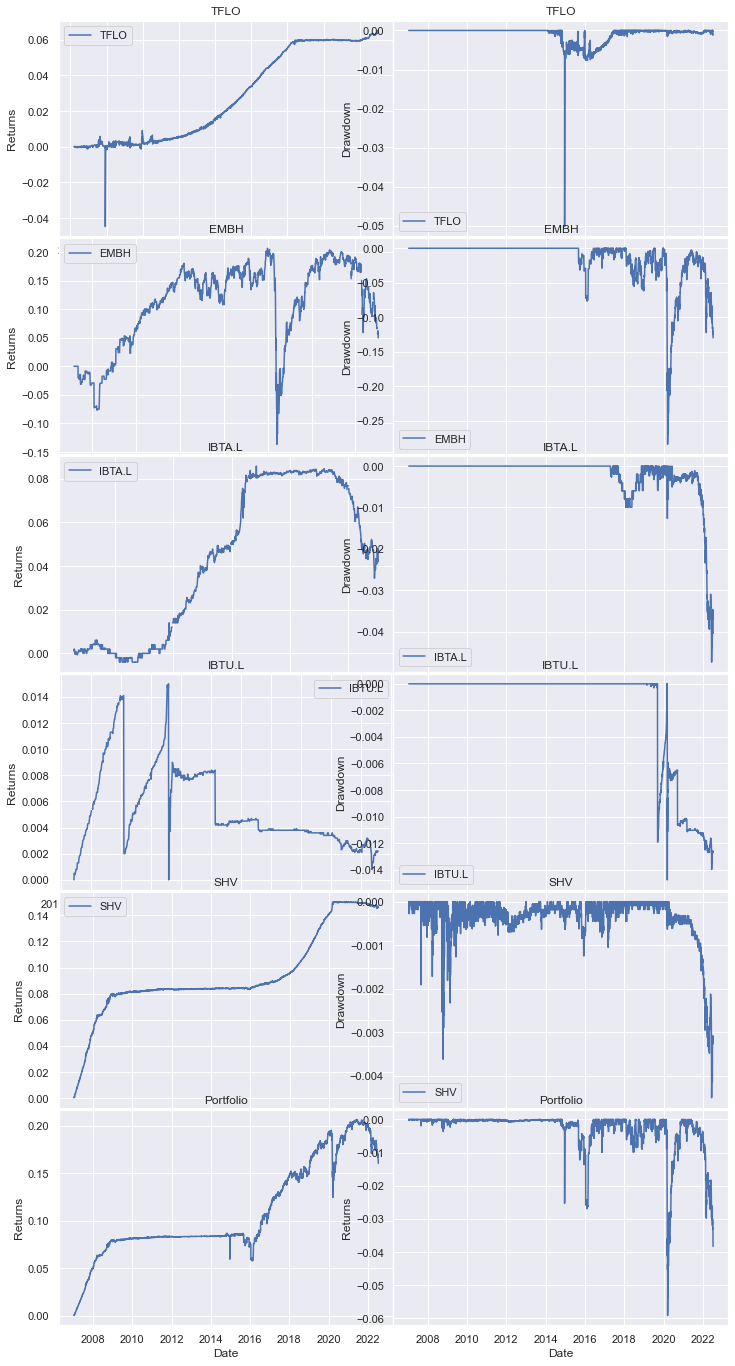

In [14]:
# portfolio = qs.utils.make_index(stocks)
n = stocks.shape[1]+1
# display(n)
portfolio = stocks.mean(axis=1)
fig, ax = plt.subplots(ncols=2, nrows=n,gridspec_kw = {'wspace':0, 'hspace':0.01}, figsize=(12,4*n))
fig.patch.set_facecolor('white')
for i, stock in enumerate(stocks.columns):
    ax[i,0].plot(qs.stats.compsum(stocks[stock]), label=stock)
    ax[i,0].legend()
    ax[i,0].set_title(stock)
    ax[i,0].set_xlabel('Date')
    ax[i,0].set_ylabel('Returns')
    ax[i,1].plot(qs.stats.to_drawdown_series(stocks[stock]), label=stock)
    ax[i,1].legend()
    ax[i,1].set_title(stock)
    ax[i,1].set_xlabel('Date')
    ax[i,1].set_ylabel('Drawdown')
    # ax[i].grid(visible=True,linestyle='--', linewidth='1', color='grey',which='both',axis='y')
ax[n-1,0].plot(qs.stats.compsum(portfolio), label='Portfolio')
ax[n-1,0].set_title('Portfolio')
ax[n-1,0].set_xlabel('Date')
ax[n-1,0].set_ylabel('Returns')
ax[n-1,1].plot(qs.stats.to_drawdown_series(portfolio), label='Portfolio')
ax[n-1,1].set_title('Portfolio')
ax[n-1,1].set_xlabel('Date')
ax[n-1,1].set_ylabel('Returns')
plt.show()
# qs.plots.snapshot(portfolio, title='Performance')

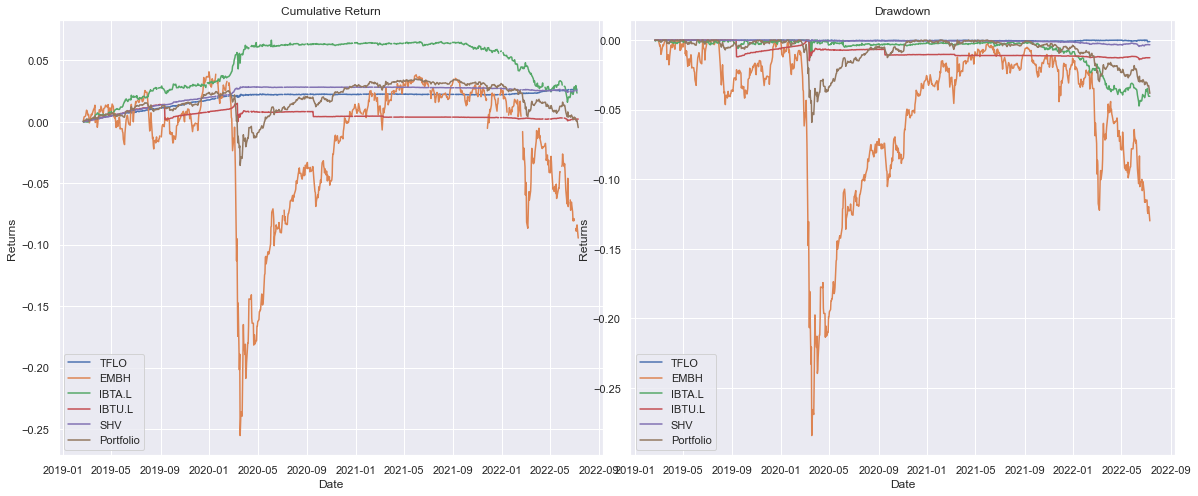

In [8]:
# portfolio = qs.utils.make_index(stocks)
n = stocks.shape[1]+1
# display(n)
portfolio = stocks.mean(axis=1)
fig, ax = plt.subplots(ncols=2, nrows=1,gridspec_kw = {'wspace':0.05, 'hspace':0.01}, figsize=(20,8))
fig.patch.set_facecolor('white')
for i, stock in enumerate(stocks.columns):
    relevantData = stocks[stock].loc[stocks[stock].index>=maxStartDate]
    ax[0].plot(qs.stats.compsum(relevantData), label=stock)
    ax[0].set_title(stock)
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Percent Return')
    ax[1].plot(qs.stats.to_drawdown_series(relevantData), label=stock)
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Percentage Drawdown')
relevantData = portfolio.loc[portfolio.index>=maxStartDate]
ax[0].plot(qs.stats.compsum(relevantData), label='Portfolio')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Returns')
ax[0].legend()
ax[0].set_title('Cumulative Return')
ax[1].plot(qs.stats.to_drawdown_series(relevantData), label='Portfolio')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Returns')
ax[1].legend()
ax[1].set_title('Drawdown')
plt.show()

In [9]:
# report = qs.reports.metrics(mode='full', returns=stock)

In [10]:
# qs.reports.plots(mode='full', returns=stock) # shows basic/full metrics

In [11]:
# qs.reports.basic(returns=stock) # shows basic metrics and plots

                           Strategy
-------------------------  ----------
Start Period               2007-01-11
End Period                 2022-07-11
Risk-Free Rate             0.0%
Time in Market             32.0%

Cumulative Return          6.4%
CAGR﹪                     0.4%

Sharpe                     0.24
Prob. Sharpe Ratio         81.91%
Smart Sharpe               0.14
Sortino                    0.34
Smart Sortino              0.2
Sortino/√2                 0.24
Smart Sortino/√2           0.14
Omega                      1.22

Max Drawdown               -5.01%
Longest DD Days            540
Volatility (ann.)          1.75%
Calmar                     0.08
Skew                       2.43
Kurtosis                   1495.9

Expected Daily %           0.0%
Expected Monthly %         0.03%
Expected Yearly %          0.39%
Kelly Criterion            10.35%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.18%
Expected Shortfall (cVaR)  -0.18%

Max Consecutive Wins       4
Max

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2014-10-29,2014-12-19,2015-12-28,425,-5.014356,-0.716880
2,2015-12-29,2016-02-16,2017-06-21,540,-0.769258,-0.749420
3,2014-10-15,2014-10-15,2014-10-16,1,-0.338296,0.000000
4,2014-10-22,2014-10-22,2014-10-28,6,-0.258590,0.000000
5,2018-02-21,2018-02-26,2018-02-27,6,-0.159170,-0.099478


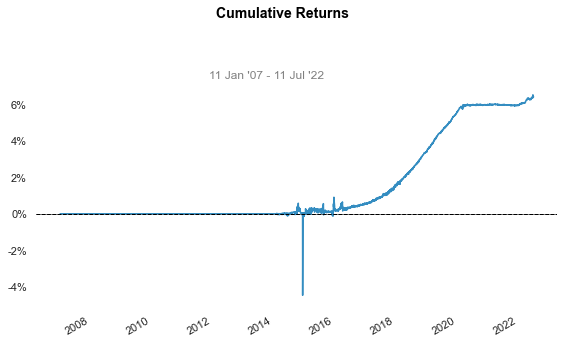

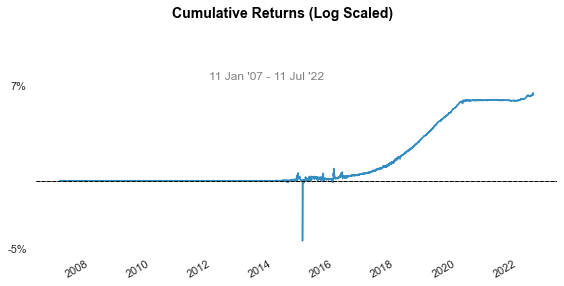

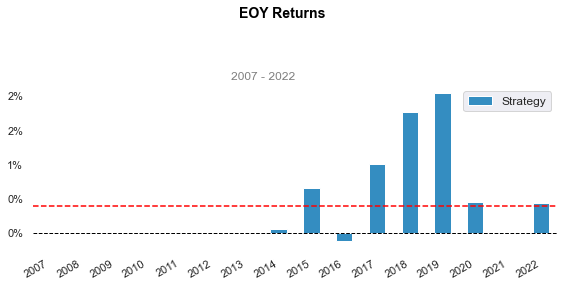

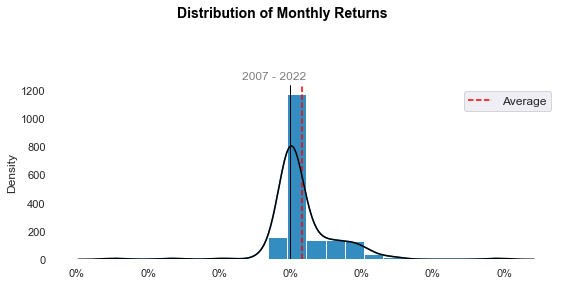

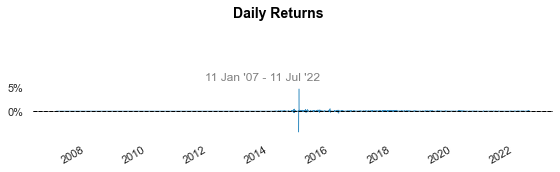

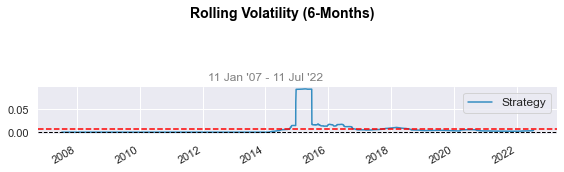

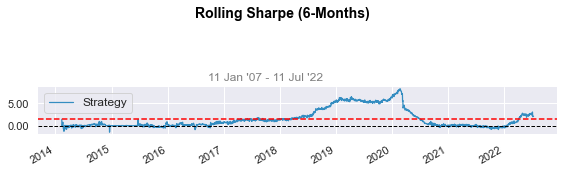

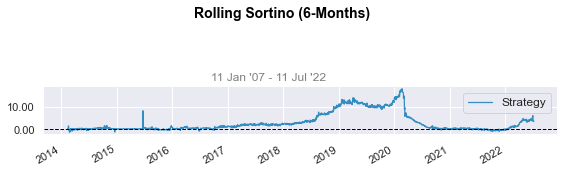

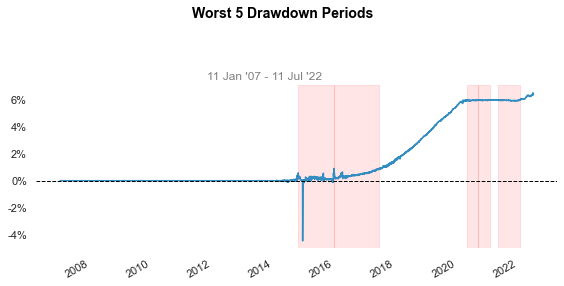

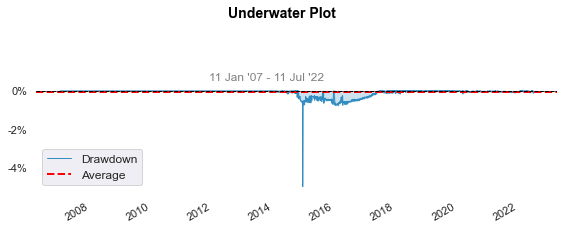

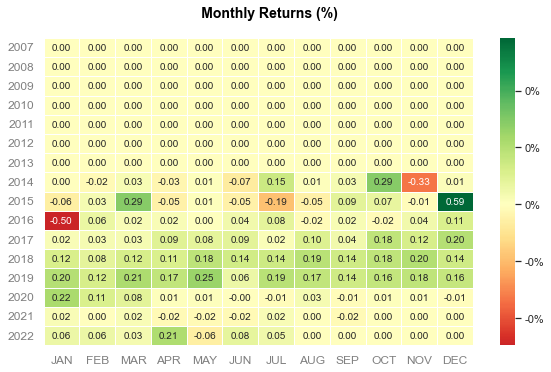

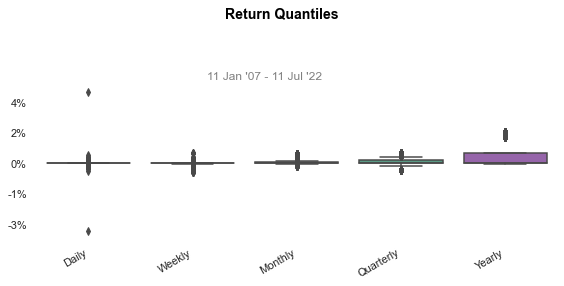

In [17]:
qs.reports.full(returns=stocks.iloc[:,0]) # shows full metrics and plots

In [ ]:
# qs.reports.html(returns=stock) # generates a complete report as html